In [1]:
!pip3 install openpyxl seaborn scikit-learn statsmodels
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku
df = pd.read_csv('../cw3/daneZ3_zad2.csv', sep=';', decimal=',')

# Podstawowe statystyki opisowe
print(df.describe())

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
                Y           X
count  200.000000  200.000000
mean    -0.057649    0.509500
std      0.348769    0.293102
min     -0.828374    0.006283
25%     -0.327804    0.244374
50%     -0.102237    0.548429
75%      0.184383    0.773101
max      0.889414    0.998870


# Zadanie 2
### 2.1
Za pomocƒÖ Metody Najmniejszych Kwadrat√≥w dokonaƒá estymacji parametr√≥w modelu postaci ùëå = ùëé + ùëèùëã. Utworzyƒá wykres reszt z tego modelu.

Estymacja parametr√≥w: a = -0.06291081798487833, b = 0.01032761411089966


/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_48970/2036762372.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model.params[0]  # Wyraz wolny
/var/folders/zr/wgdvlh6d0h1__zchdn3xjf7c0000gn/T/ipykernel_48970/2036762372.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model.params[1]  # Nachylenie


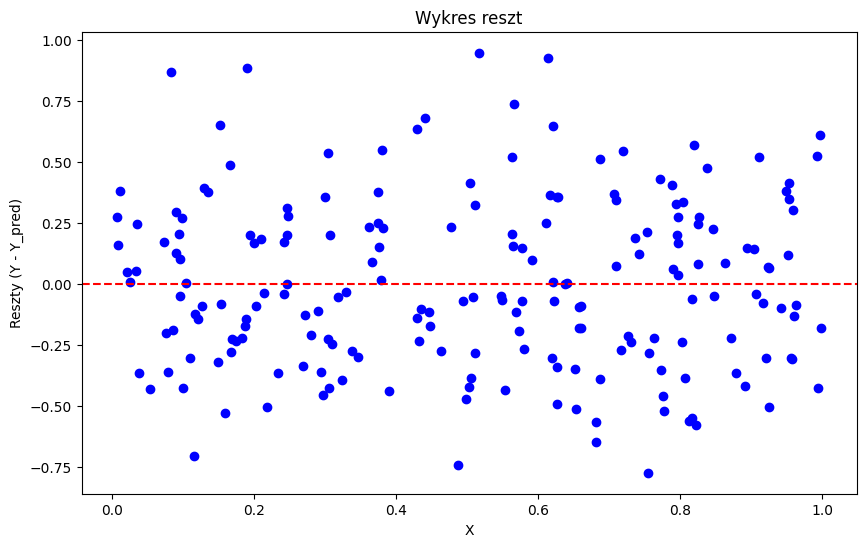

Estymacja parametr√≥w: a = -0.0629108179848783, b = 0.010327614110899686


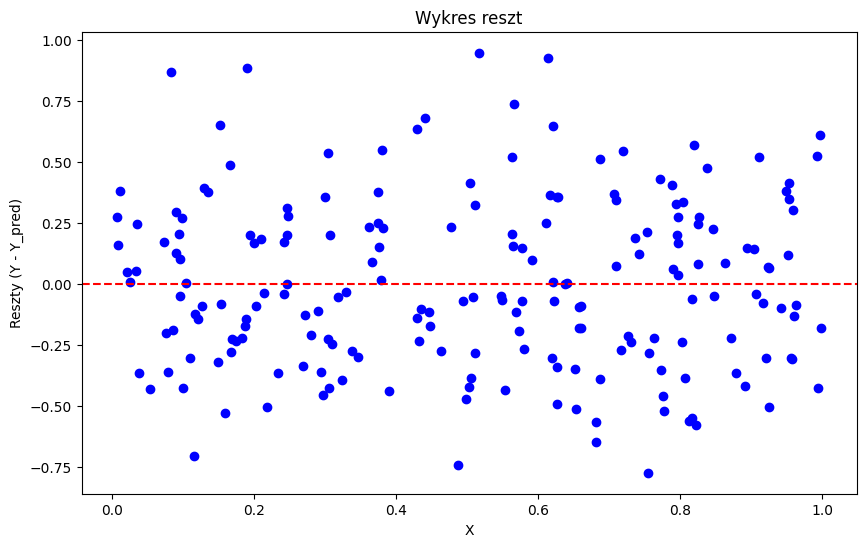

In [4]:
import numpy as np
from statsmodels.api import OLS, add_constant

# Dodanie wyrazu wolnego (sta≈Ça) do X
X = add_constant(df['X'])  # Dodajemy 1 w ka≈ºdej pr√≥bce, co odpowiada wyrazowi wolnemu w r√≥wnaniu

# Model regresji
model = OLS(df['Y'], X).fit()  # Przygotowanie modelu

# Estymowane parametry (a i b)
a = model.params[0]  # Wyraz wolny
b = model.params[1]  # Nachylenie
print(f"Estymacja parametr√≥w: a = {a}, b = {b}")

# Przewidywane warto≈õci Y
df['Y_pred'] = model.predict(X)

# Obliczenie reszt
df['residuals'] = df['Y'] - df['Y_pred']

# Wykres reszt
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['residuals'], color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Wykres reszt')
plt.xlabel('X')
plt.ylabel('Reszty (Y - Y_pred)')
plt.show()

# Teraz samemu rƒôcznie obliczmy model za pomocƒÖ MNK
# Obliczanie ≈õrednich X i Y
X_mean = df['X'].mean()  # ≈örednia z kolumny X
Y_mean = df['Y'].mean()  # ≈örednia z kolumny Y

# Obliczanie parametru b (nachylenie)
b_numerator = np.sum((df['X'] - X_mean) * (df['Y'] - Y_mean))  # Suma (X_i - X_mean)(Y_i - Y_mean)
b_denominator = np.sum((df['X'] - X_mean) ** 2)  # Suma (X_i - X_mean)^2
b = b_numerator / b_denominator

# Obliczanie parametru a (wyraz wolny)
a = Y_mean - b * X_mean

print(f"Estymacja parametr√≥w: a = {a}, b = {b}")

# Obliczenie przewidywanych warto≈õci Y
df['Y_pred'] = a + b * df['X']

# Obliczenie reszt
df['residuals'] = df['Y'] - df['Y_pred']

# Wykres reszt
plt.figure(figsize=(10, 6))
plt.scatter(df['X'], df['residuals'], color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Wykres reszt')
plt.xlabel('X')
plt.ylabel('Reszty (Y - Y_pred)')
plt.show()

### 2.2
SporzƒÖdziƒá korelogram dla reszt z modelu. Zinterpretowaƒá go (opisaƒá funkcje ACF i PACF)

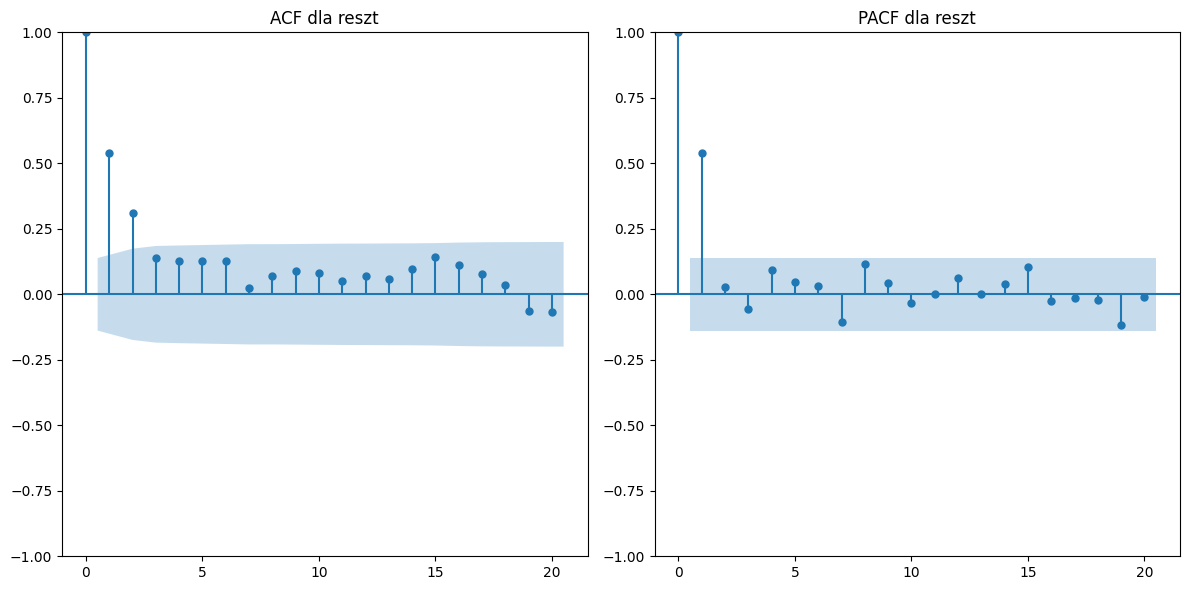

In [5]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Wykres ACF i PACF dla reszt
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df['residuals'], lags=20, ax=plt.gca(), title='ACF dla reszt')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df['residuals'], lags=20, ax=plt.gca(), title='PACF dla reszt')

plt.tight_layout()
plt.show()

W przypadku obu wykres√≥w widzimy, ≈ºe nie wszystkie dane sƒÖ zbli≈ºone do 0 i niekt√≥rƒô odstajƒÖ, szczeg√≥lnie poczƒÖtkowe 2-3.

ACF:
PoczƒÖtkowe op√≥≈∫nienia w ACF mogƒÖ wskazywaƒá na obecno≈õƒá autokorelacji w danych.
Oznacza to, ≈ºe warto≈õci reszt w obecnym momencie sƒÖ powiƒÖzane z warto≈õciami z poprzednich moment√≥w.
Je≈õli ACF pokazuje wyra≈∫nƒÖ korelacjƒô w poczƒÖtkowych op√≥≈∫nieniach (np. op√≥≈∫nienie 1, 2, 3),
mo≈ºe to sugerowaƒá, ≈ºe model regresji nie uwzglƒôdni≈Ç w pe≈Çni jakiej≈õ struktury czasowej, kt√≥ra jest obecna w danych.

PACF:
Je≈õli PACF pokazuje, ≈ºe poczƒÖtkowe punkty sƒÖ znaczƒÖce, to mo≈ºe to oznaczaƒá,
≈ºe istnieje zale≈ºno≈õƒá pomiƒôdzy zmiennymi w r√≥≈ºnych op√≥≈∫nieniach, kt√≥rƒÖ nale≈ºy uwzglƒôdniƒáW szczeg√≥lno≈õci,
je≈õli PACF ma wyra≈∫ny "ciƒôcie" po pierwszych kilku op√≥≈∫nieniach, to mo≈ºe sugerowaƒá,
≈ºe zale≈ºno≈õƒá w danych jest ograniczona do tych poczƒÖtkowych op√≥≈∫nie≈Ñ i ≈ºe inne op√≥≈∫nienia ju≈º nie majƒÖ wp≈Çywu.

### 2.3
WykorzystujƒÖc testy Durbina-Watsona, Breuscha-Godfreya oraz Ljung-Boxa sprawdziƒá wystƒôpowanie autokorelacji sk≈Çadnika losowego.

In [6]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf, pacf, q_stat

residuals = model.resid  # Reszty z modelu

# 2. Test Durbin-Watson
dw_statistic = durbin_watson(residuals)
print(f"Test Durbin-Watson: {dw_statistic}")

# 3. Test Breuscha-Godfreya (sprawdzenie autokorelacji w wy≈ºszych rzƒôdach)
bg_results = acorr_breusch_godfrey(model, nlags=4)  # Testujemy dla 4 op√≥≈∫nie≈Ñ

# Wyodrƒôbnienie wynik√≥w
bg_test_stat = bg_results[0]  # Statystyka testowa
bg_p_value = bg_results[1]  # p-value

print(f"Test Breuscha-Godfreya: Statystyka = {bg_test_stat}, p-value = {bg_p_value}")

# 4. Test Ljung-Boxa (sprawdzenie autokorelacji w resztach)
ljung_box_stat, ljung_box_p_value = q_stat(acf(residuals, nlags=10)[1:], len(residuals))  # Testujemy dla pierwszych 10 op√≥≈∫nie≈Ñ
print(f"Test Ljung-Boxa: Statystyka = {ljung_box_stat[-1]}, p-value = {ljung_box_p_value[-1]}")

Test Durbin-Watson: 0.9171189355125734
Test Breuscha-Godfreya: Statystyka = 61.170251833837106, p-value = 1.6463842339186827e-12
Test Ljung-Boxa: Statystyka = 96.70520328155368, p-value = 2.4823264273301207e-16


**Test Durbin-Watson (DW)**
Poniewa≈º warto≈õƒá statystyki Durbin-Watsona jest znacznie mniejsza ni≈º 2 (w tym przypadku bliska 1), wskazuje to na pozytywnƒÖ autokorelacjƒô w resztach. Oznacza to, ≈ºe reszty z modelu sƒÖ skorelowane w spos√≥b pozytywny, tzn. je≈õli jedna reszta jest dodatnia, to nastƒôpna reszta r√≥wnie≈º ma tendencjƒô do bycia dodatnia.

**Test Breuscha-Godfreya (BG)**
p-value jest bardzo ma≈Çe (mniejsze ni≈º 0.05), co oznacza, ≈ºe odrzucamy hipotezƒô zerowƒÖ (brak autokorelacji). To sugeruje, ≈ºe w resztach wystƒôpuje istotna autokorelacja, nawet w wy≈ºszych rzƒôdach. Mo≈ºna stwierdziƒá, ≈ºe model nie jest w pe≈Çni odpowiedni, poniewa≈º reszty sƒÖ zale≈ºne od siebie.

**Test Ljung-Boxa**
p-value r√≥wnie≈º jest bardzo ma≈Çe (mniejsze ni≈º 0.05), co wskazuje na istotnƒÖ autokorelacjƒô w resztach. Wskazuje to, ≈ºe reszty nie sƒÖ niezale≈ºne, co mo≈ºe sugerowaƒá, ≈ºe model nie uwzglƒôdnia wszystkich istotnych zale≈ºno≈õci w danych.


### 2.4
Zastosowaƒá procedurƒô Cochrane'a -Orcutta.

In [7]:
import statsmodels.api as sm

# Reszty z pierwotnego modelu
residuals = model.resid

# Estymacja rho (wsp√≥≈Çczynnika autokorelacji)
# Bierzemy korelacjƒô reszt przesuniƒôtych o 1
rho = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
print(f"Szacowane rho: {rho}")

# Przekszta≈Çcenie zmiennych Y i X
Y_transformed = df['Y'].iloc[1:] - rho * df['Y'].iloc[:-1].values
X_transformed = df['X'].iloc[1:] - rho * df['X'].iloc[:-1].values

# Nowy model na przekszta≈Çconych danych
X_transformed = sm.add_constant(X_transformed)  # Dodaj sta≈ÇƒÖ
model_corrected = sm.OLS(Y_transformed, X_transformed).fit()

# Wy≈õwietlenie wynik√≥w
print(model_corrected.summary())

Szacowane rho: 0.5400737709141391
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.212
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.139
Time:                        12:29:49   Log-Likelihood:                -36.649
No. Observations:                 199   AIC:                             77.30
Df Residuals:                     197   BIC:                             83.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0